In [9]:
#!pip install xgboost

!pip install tensorflow


/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [10]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

#Libraries for Saving the Model
from pickle import dump
from pickle import load

from xgboost import XGBClassifier


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
dataset = pd.read_csv("https://raw.githubusercontent.com/tatsath/fin-ml/master/Chapter%206%20-%20Sup.%20Learning%20-%20Classification%20models/CaseStudy1%20-%20Fraud%20Detection/creditcard_sample.csv")

In [13]:
dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,67374,-0.228866,0.086431,0.791165,-1.451021,1.141154,0.070110,0.442420,-0.128557,0.305720,...,0.162295,0.732803,-0.380588,-1.086826,0.376692,-0.481770,-0.077937,-0.220115,9.06,0
99995,67374,-1.336121,1.671947,0.994155,0.420318,-0.440923,-0.008386,-0.893860,-2.051884,-1.091297,...,-1.135695,0.509302,0.074188,0.266186,-0.117614,-0.515392,-0.049653,0.085873,2.50,0
99996,67374,0.662465,-1.336560,0.791566,0.425701,-1.391976,0.145471,-0.476652,0.203164,1.379204,...,-0.063744,-0.548785,-0.103769,0.136687,-0.078936,0.948579,-0.075607,0.053555,269.83,0
99997,67374,-4.930001,-1.090715,0.298037,1.890524,-1.058087,-0.329315,-1.498278,1.750301,-0.325311,...,0.051768,0.166222,-0.585006,0.219239,0.181934,-0.253197,0.113801,-1.043315,45.00,0


#3. Exploratory Data Analysis

In [14]:
dataset.shape

(99999, 31)

In [15]:
pd.set_option('precision', 3)
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0


In [16]:
dataset["Class"].value_counts().rename(index={0:"Not_Fraud",1:"Fraud"})

Not_Fraud    99776
Fraud          223
Name: Class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f759cf758d0>,
      dtype=object)

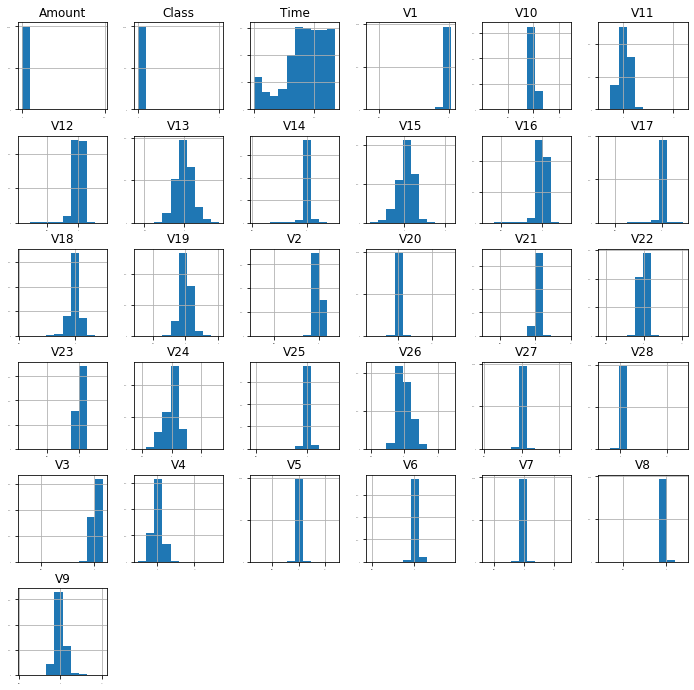

In [17]:
dataset.hist(xlabelsize=1, ylabelsize=1, figsize=(12,12))


In [18]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(k=10)
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs      Score
17   V17  20657.815
14   V14  16227.609
3     V3  10383.969
12   V12   9644.180
10   V10   7909.706
16   V16   6829.653
7     V7   6157.564
11   V11   3567.597
4     V4   2840.800
18   V18   2632.037


### 5.1. Train-test split and evaluation metrics.

In [20]:
validation_size = 0.2
seed = 7
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=validation_size)


### 5.2. Checking Models and Algorithms

In [21]:
num_folds = 3
scoring = "accuracy"

In [24]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [25]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[08:16:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:16:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:17:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.999475 (0.000153)
LR: 0.998437 (0.000071)
LDA: 0.999075 (0.000127)
KNN: 0.997762 (0.000289)
CART: 0.999050 (0.000124)


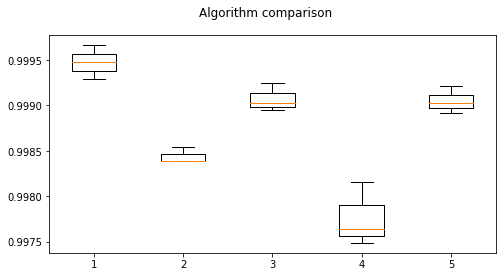

In [28]:
fig = pyplot.figure()
fig.suptitle("Algorithm comparison")
ax= fig.add_subplot(111)
pyplot.boxplot(results)
fig.set_size_inches(8,4)
pyplot.show()

In [29]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
predictions = model.predict(X_validation)

In [33]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.99915
[[19948     8]
 [    9    35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19956
           1       0.81      0.80      0.80        44

    accuracy                           1.00     20000
   macro avg       0.91      0.90      0.90     20000
weighted avg       1.00      1.00      1.00     20000



#### 6. Model  Tuning

In [34]:
scoring = "recall"
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[08:58:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.814127 (0.078712)
LR: 0.530387 (0.046477)
LDA: 0.734513 (0.112089)
KNN: 0.000000 (0.000000)
CART: 0.778793 (0.077158)


In [36]:
model = XGBClassifier()
model.fit(X_train,Y_train)

[09:03:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [37]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.99915
[[19948     8]
 [    9    35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19956
           1       0.81      0.80      0.80        44

    accuracy                           1.00     20000
   macro avg       0.91      0.90      0.90     20000
weighted avg       1.00      1.00      1.00     20000



### 6.2. Model Tuning for balancing the sample by Random Under Sampling


In [50]:
df = pd.concat([X_train,Y_train],axis=1)
# amount of fraud classes 175 rows.
fraud_df = df.loc[df["Class"]==1]
non_fraud_df = df.loc[df["Class"]==0][:179]

In [51]:
normal_distributed_df = pd.concat([fraud_df,non_fraud_df])

In [52]:
df_new = normal_distributed_df.sample(frac=1,random_state=42) # frac daj mi uzorak koji nije isti
Y_train_new = df_new["Class"]
X_train_new = df_new.loc[:,dataset.columns !="Class"]

Y_train_new.value_counts()

1    179
0    179
Name: Class, dtype: int64

In [58]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(("XGB",XGBClassifier()));
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))


In [64]:
scoring='recall'

In [65]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.921963 (0.027341)
LDA: 0.828684 (0.060608)
KNN: 0.586809 (0.009574)
CART: 0.921196 (0.023005)
NB: 0.859937 (0.029591)
SVM: 0.500144 (0.093179)
[09:31:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:31:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:31:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.927428 (0.020149)
AB: 0.921963 (0.027341)
GBM: 0.938357 (0.009011)
RF: 0.916115 (0.01365